In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np

from scipy.fft import rfft, irfft

In [2]:
t = np.arange(-10.0,10.0,0.01)

def sineplot(x):    
    mpl.plot(t,np.sin(x*t))
    mpl.show()

In [3]:
interact(sineplot, x=(0.,20.0));

interactive(children=(FloatSlider(value=10.0, description='x', max=20.0), Output()), _dom_classes=('widget-int…

In [4]:
def angleToOmega(angle,wavelength):
    return 2*np.pi/wavelength * np.sin(angle)

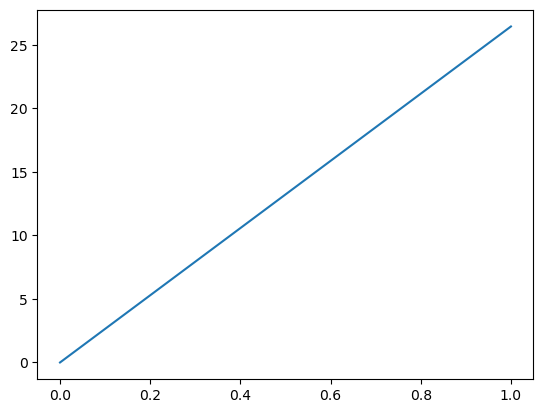

In [5]:
mpl.plot(np.arange(0,np.pi/2),angleToOmega(np.arange(0,np.pi/2),0.2))

In [6]:
def aperture(x,width,pos):
    return np.heaviside(x - pos + width/2,1) * (1 - np.heaviside(x - pos - width/2,1))

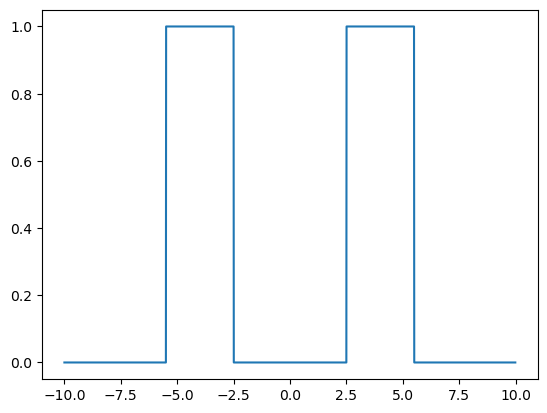

In [7]:
mpl.plot(t,aperture(t,3,-4)+aperture(t,3,4))
mpl.show()

C:\Users\thf63jn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


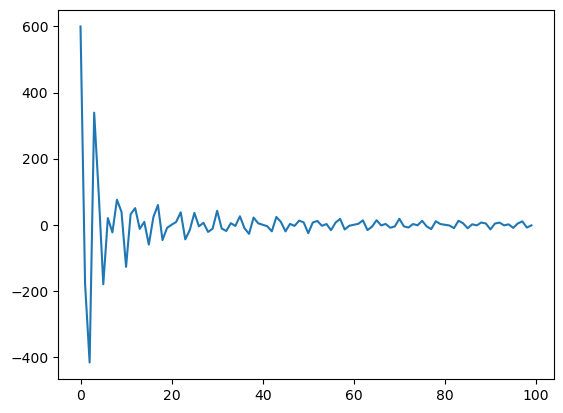

In [8]:
spectrum = rfft(aperture(t,3,-4)+aperture(t,3,4))

mpl.plot(spectrum[0:100])
mpl.show()

In [9]:
def farFieldNA(angle,wavelength):
    cutSpectrum = np.array(spectrum)
    cutSpectrum[int(angleToOmega(angle,wavelength)):]=0
    
    mpl.plot(irfft(cutSpectrum))
    mpl.show()

In [10]:
interact(farFieldNA, angle=(0.,np.pi/2,0.01), wavelength=(0.05,0.5,0.05));

interactive(children=(FloatSlider(value=0.78, description='angle', max=1.5707963267948966, step=0.01), FloatSl…